# Aprendizaje supervisado


¿Qué es?
- Es un tipo de machine learning en el que "entrenas" a un algoritmo dándole ejemplos que ya tienen la respuesta correcta.
- Es como aprender con un maestro que te da problemas (los datos) y te muestra las soluciones (las "etiquetas").

Los Dos Tipos Principales

- Clasificación: Predecir una categoría (Ej: ¿Es Spam/No Spam? ¿Es un Gato/Perro?).
- Regresión: Predecir un número (Ej: ¿Cuál será el precio de esta casa? ¿Cuántos grados hará mañana?).

Para comprender como funciona el aprendizaje supervizado, tomaremos un ejemplo.

Tenemos dos datos
- Precio de casa vendida
- Metro cuadrados de la casa venida

Predición esperada:
- Predecir el precio con base a los metros de la casa


# Modelos usando Regresión 

## Modelo de regresion con solo un features

In [53]:
#primero instalar las librerias
pip install pandas
pip install scikit-learn

SyntaxError: invalid syntax (3702852444.py, line 2)

In [2]:
import pandas as pd #Libreria para manejo de datos
import numpy as np #Libreria para manejo de arreglos y operaciones matematicas ()
from sklearn.model_selection import train_test_split # Libreria para dividir los datos
from sklearn.linear_model import LinearRegression # Libreria para regresion lineal

In [3]:
# Cargar los datos desde tu archivo CSV
print("Cargando el archivo 'datos_casas_venta.csv'...")
nombre_archivo = 'datos_casas_venta.csv'
df = pd.read_csv(nombre_archivo)

Cargando el archivo 'datos_casas_venta.csv'...


In [4]:
# Muestra las primeras filas del DataFrame

df.head(5) 

,MetrosCuadrados,PrecioVenta
0,117.0,322474.11
1,96.0,242638.03
2,143.0,387192.04
3,63.0,186908.47
4,153.0,420429.33


In [5]:
# --- 2. Definir X (features) e y (target) ---
X = df[['MetrosCuadrados']] # Variable independiente (input o feature)
y = df['PrecioVenta']       # Variable dependiente (output o target)

# --- Mostrar las primeras 10 filas ---
print("Mostando x (features) ")
print(X.head(10))

print("\nMostrando y (target) ")
print(y.head(10))

Mostando x (features) 
   MetrosCuadrados
0            117.0
1             96.0
2            143.0
3             63.0
4            153.0
5            103.0
6            117.0
7             88.0
8             92.0
9             86.0

Mostrando y (target) 
0    322474.11
1    242638.03
2    387192.04
3    186908.47
4    420429.33
5    290864.62
6    309362.91
7    273080.33
8    241819.74
9    236513.66
Name: PrecioVenta, dtype: float64


In [6]:
# Dividimos: 80% entrenamiento, 20% prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Entrenar el modelo
print("\nEntrenando el modelo")
modelo = LinearRegression()
modelo.fit(X_train, y_train) # El modelo aprende de los datos de entrenamiento
print("Modelo entrenado correctamente.")


Entrenando el modelo
Modelo entrenado correctamente.


In [8]:
#métrica de evaluación del modelo
score = modelo.score(X_test, y_test)
print(f"Puntuación: {score}")

Puntuación: 0.9389649969838947


## Ejercicio: 70% entrenamiendo, 30% test, 50% entrenamiento, 50% test



## 1. El Entrenamiento (La Función de Costos - MSE)

El objetivo aquí es encontrar los valores perfectos de `w` (peso) y `b` (sesgo) para tu modelo:
`PrecioVenta = w * MetrosCuadrados + b`

La **Función de Costos (MSE)** es el "maestro" que le dice al modelo qué tan lejos está de la respuesta en cada intento

| $y_{\text{real}}$ (PrecioVenta) | $x$ (MetrosCuadrados) |
| :--- | :--- |
| 322,474 | 117 |
| 242,638 | 96 |
| 387,192 | 143 |



**Intento 1: Adivinanza "Fría" (w=2500, b=50000)**
El modelo prueba una fórmula: `Precio = 2500 * Metros + 50000`

1.  **Valores de Entrada (Predicciones):**
    * Predicción 1: (2500 * 117) + 50000 = **342,500**
    * Predicción 2: (2500 * 96) + 50000 = **290,000**
    * Predicción 3: (2500 * 143) + 50000 = **407,500**

2.  **Valores de Entrada (Reales):**
    * Real 1: **322,474**
    * Real 2: **242,638**
    * Real 3: **387,192**

3.  **La Función de Costos (MSE) calcula el error:**
    * Error 1: (342,500 - 322,474)² = 401,040,676
    * Error 2: (290,000 - 242,638)² = 2,243,159,844
    * Error 3: (407,500 - 387,192)² = 412,415,264
    * **COSTO (Promedio):** (401M + 2243M + 412M) / 3 = **1,018,871,928** (¡Un error gigante!)

El modelo recibe ese costo gigante y sabe que está "frío". Ajusta `w` y `b` y lo intenta de nuevo.

**Intento 2: Adivinanza "Tibia" (w=2800, b=20000)**
El modelo prueba: `Precio = 2800 * Metros + 20000`

1.  **Valores de Entrada (Predicciones):**
    * Predicción 1: (2800 * 117) + 20000 = **347,600**
    * Predicción 2: (2800 * 96) + 20000 = **288,800**
    * Predicción 3: (2800 * 143) + 20000 = **420,400**

2.  **Valores de Entrada (Reales):** (Los mismos de antes)

3.  **La Función de Costos (MSE) calcula el error:**
    * Error 1: (347,600 - 322,474)² = 631,313,529
    * Error 2: (288,800 - 242,638)² = 2,130,958,244
    * Error 3: (420,400 - 387,192)² = 1,002,110,884
    * **COSTO (Promedio):** (631M + 2130M + 1002M) / 3 = **1,254,794,219**

¡Ups! El costo subió. El modelo sabe que se movió en la dirección incorrecta y ajustará `w` y `b` en la otra dirección.

Este proceso (`.fit()`) se repite hasta que encuentra la **"mejor línea"**: la combinación de `w` y `b` que produce el **COSTO (MSE) más bajo posible**.

---

## 2. La Evaluación (El Score R2)

Ahora, digamos que el entrenamiento terminó. La Función de Costos encontró la "mejor línea" posible.

Supongamos que la mejor línea es: `Precio = 2750 * Metros + 25000` (es una suposición).

Ahora **evaluamos** esta línea con el **R2**. El R2 necesita una línea de base para comparar: la **"Línea Tonta"** (el precio promedio de todas tus casas).

1.  **Calcular la "Línea Tonta":**
    * Calculamos el precio promedio de *todos* tus 20 datos. (Haciendo el cálculo rápido, el promedio de tus datos es aprox. **$310,957**).
    * La "Línea Tonta" es una línea horizontal en $310,957.

2.  **El R2 hace dos preguntas:**
    * **Pregunta A:** ¿Cuál es el error total si uso la "Línea Tonta"? (Esto se llama **Error Total**).
    * **Pregunta B:** ¿Cuál es el error total si uso mi "Mejor Línea"? (Esto se llama **Error del Modelo**).

3.  **El Cálculo del R2:**
    $$
    R2 = 1 - \frac{\text{Error del Modelo}}{\text{Error Total}}
    $$

**Ejemplo de resultado:**
Si tu **Score (R2) es 0.90 (90%)**, significa:

> "Mi 'Mejor Línea' (encontrada usando la Función de Costos) es un **90% mejor** que la 'Línea Tonta' (adivinar el promedio). Mi línea **explica el 90%** de por qué los precios de las casas suben o bajan".

In [ ]:
pip install matplotlib

Cargando el archivo 'datos_casas_venta.csv'...
Entrenando el modelo...
¡Modelo entrenado!

--- Parámetros Encontrados ---
Peso (w, por MetrosCuadrados): 2429.35
Sesgo (b, el punto de partida): 35476.40
Fórmula Aprendida: Precio = (2429.35 * Metros) + 35476.40

--- Costo Final (en Datos de Prueba) ---
Función de Costos (MSE): 259,757,969.10
Error Promedio (RMSE): $16,117.01
(Esto significa que, en promedio, las predicciones del modelo se equivocan por ${rmse:,.2f})

Generando gráfico...


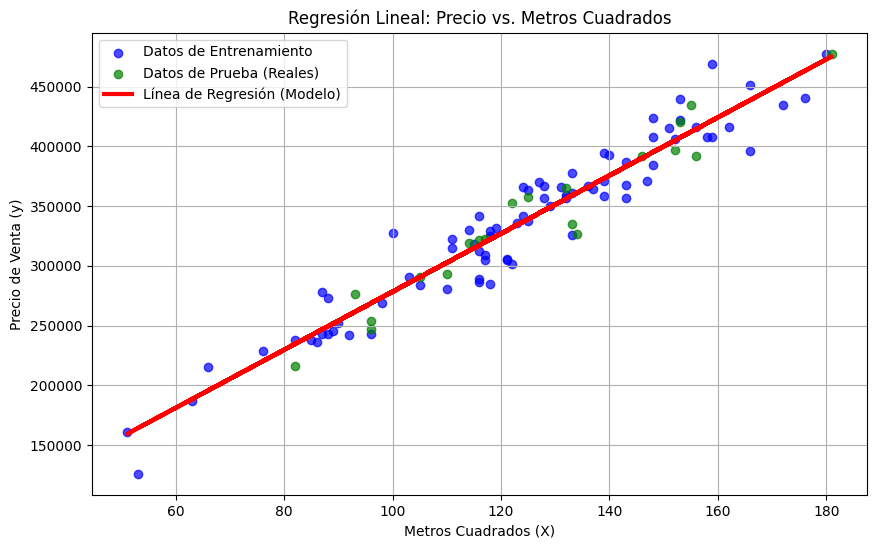

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 

print("Cargando el archivo 'datos_casas_venta.csv'...")
df = pd.read_csv('datos_casas_venta.csv')

X = df[['MetrosCuadrados']]
y = df['PrecioVenta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Entrenando el modelo...")
modelo = LinearRegression()
modelo.fit(X_train, y_train) 
print("¡Modelo entrenado!")

    # -----------------------------------------------------------------
    # --- 1. MOSTRAR LOS VALORES QUE ENCONTRÓ (w y b) ---
    # -----------------------------------------------------------------
    # Estos son los parámetros (la "línea de ajuste") que el modelo
    # encontró después de minimizar la Función de Costos.

w = modelo.coef_[0]  # El peso (w)
b = modelo.intercept_ # El sesgo (b)

print("\n--- Parámetros Encontrados ---")
print(f"Peso (w, por MetrosCuadrados): {w:.2f}")
print(f"Sesgo (b, el punto de partida): {b:.2f}")
print(f"Fórmula Aprendida: Precio = ({w:.2f} * Metros) + {b:.2f}")


# -----------------------------------------------------------------
# --- 2. MOSTRAR EL VALOR FINAL DE LA FUNCIÓN DE COSTOS (MSE) ---
# -----------------------------------------------------------------
# Para ver el costo final, hacemos predicciones en nuestros datos de prueba
# y calculamos el MSE (Error Cuadrático Medio) nosotros mismos.

y_pred = modelo.predict(X_test) # Predicciones del modelo

# Comparamos las predicciones (y_pred) con los valores reales (y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # RMSE le aplicamos raíz cuadrada para tener el error en las mismas unidades

print("\n--- Costo Final (en Datos de Prueba) ---")
print(f"Función de Costos (MSE): {mse:,.2f}")
print(f"Error Promedio (RMSE): ${rmse:,.2f}")
print(f"(Esto significa que, en promedio, las predicciones del modelo se equivocan por ${rmse:,.2f})")

print("\nGenerando gráfico...")

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos de Entrenamiento', alpha=0.7)
plt.scatter(X_test, y_test, color='green', label='Datos de Prueba (Reales)', alpha=0.7)

plt.plot(X, modelo.predict(X), color='red', linewidth=3, label='Línea de Regresión (Modelo)')

plt.title('Regresión Lineal: Precio vs. Metros Cuadrados')
plt.xlabel('Metros Cuadrados (X)')
plt.ylabel('Precio de Venta (y)')
plt.legend() 
plt.grid(True) 
plt.show()

Cargando el archivo 'datos_casas_venta.csv'...
Entrenando el modelo con SGD...

--- Progreso del Entrenamiento (Iteración por Iteración) ---
Iteración |   w (Peso) |   b (Sesgo) | Costo (J - MSE)
-----------------------------------------------------------
    0     |     0.2769 |    -0.0078 |        0.5436
    1     |     0.4738 |    -0.0105 |        0.3123
    2     |     0.6139 |    -0.0102 |        0.1949
    3     |     0.7137 |    -0.0086 |        0.1352
    4     |     0.7846 |    -0.0064 |        0.1049
    5     |     0.8352 |    -0.0042 |        0.0894
    6     |     0.8712 |    -0.0020 |        0.0815
    7     |     0.8968 |    -0.0002 |        0.0775
    8     |     0.9151 |     0.0014 |        0.0754
    9     |     0.9281 |     0.0027 |        0.0743
-----------------------------------------------------------
¡Modelo entrenado!

Parámetros finales encontrados: w=0.9281, b=0.0027

Generando gráfico de la Función de Costos...


c:\Users\gerar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\gerar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\gerar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\gerar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

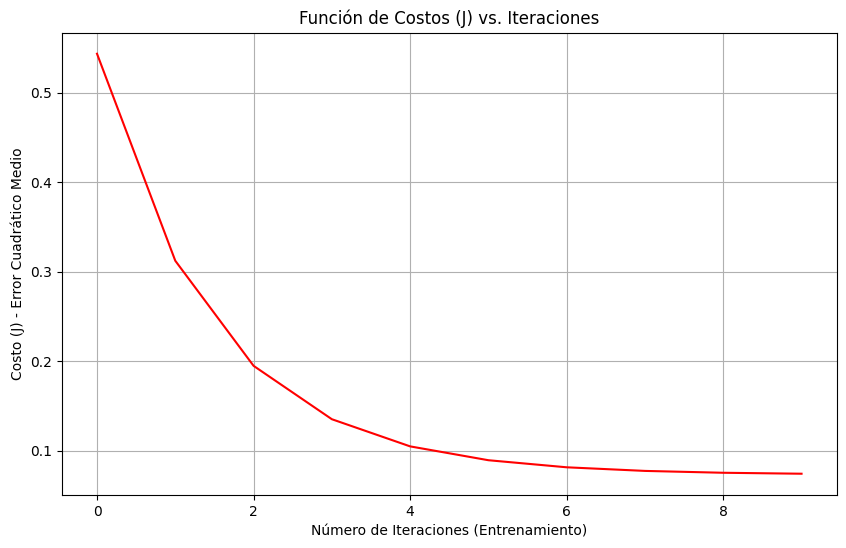

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

print("Cargando el archivo 'datos_casas_venta.csv'...")
try:
    df = pd.read_csv('datos_casas_venta.csv')
except FileNotFoundError:
    print("Error: No se encontró 'datos_casas_venta.csv'. Generando datos...")
    # (Generamos datos si no existen para que el script funcione)
    num_datos = 100
    np.random.seed(42)
    metros_cuadrados = np.random.normal(loc=120, scale=25, size=num_datos)
    ruido = np.random.normal(loc=0, scale=20000, size=num_datos)
    precio = (metros_cuadrados * 2500) + 30000 + ruido
    metros_cuadrados = np.abs(metros_cuadrados).round(0)
    precio = np.abs(precio).round(2)
    df = pd.DataFrame({'MetrosCuadrados': metros_cuadrados, 'PrecioVenta': precio})
    df.to_csv('datos_casas_venta.csv', index=False)


X = df[['MetrosCuadrados']]
y = df['PrecioVenta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- ¡IMPORTANTE! SGD NECESITA DATOS ESCALADOS ---
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# --- 2. ENTRENAMIENTO ITERATIVO ---
print("Entrenando el modelo con SGD...")

modelo_sgd = SGDRegressor(max_iter=1, eta0=0.01, warm_start=True, random_state=42)

lista_de_costos = []
n_iteraciones = 10

# --- ¡NUEVA TABLA DE PROGRESO! ---
print("\n--- Progreso del Entrenamiento (Iteración por Iteración) ---")
print("Iteración |   w (Peso) |   b (Sesgo) | Costo (J - MSE)")
print("-----------------------------------------------------------")

for i in range(n_iteraciones):
    modelo_sgd.fit(X_train_scaled, y_train_scaled)
    y_pred_iteracion = modelo_sgd.predict(X_train_scaled)
    costo_mse = mean_squared_error(y_train_scaled, y_pred_iteracion)
    lista_de_costos.append(costo_mse)
    
    # --- ¡AQUÍ ESTÁ LA MODIFICACIÓN! ---
    # Extraemos w y b EN CADA iteración
    w_iteracion = modelo_sgd.coef_[0]
    b_iteracion = modelo_sgd.intercept_[0]
    
    # Imprimimos los valores de esta iteración
    print(f"    {i: <5} | {w_iteracion: >10.4f} | {b_iteracion: >10.4f} | {costo_mse: >13.4f}")

print("-----------------------------------------------------------")
print("¡Modelo entrenado!")

# --- 3. MOSTRAR LOS PARÁMETROS FINALES ---
# (Estos serán los mismos que los de la última iteración)
w_final = modelo_sgd.coef_[0]
b_final = modelo_sgd.intercept_[0] 
print(f"\nParámetros finales encontrados: w={w_final:.4f}, b={b_final:.4f}")


# --- 4. ¡GRAFICAR LA FUNCIÓN DE COSTOS (J) VS. ITERACIONES! ---
print("\nGenerando gráfico de la Función de Costos...")

plt.figure(figsize=(10, 6))
plt.plot(range(n_iteraciones), lista_de_costos, 'r-')
plt.title('Función de Costos (J) vs. Iteraciones')
plt.xlabel('Número de Iteraciones (Entrenamiento)')
plt.ylabel('Costo (J) - Error Cuadrático Medio')
plt.grid(True)
plt.show()

# Modelo de regresion con varios features

In [28]:
# Librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


print("Librerias importadas correctamente.")


Librerias importadas correctamente.


In [29]:
# Cargar datos y preparar
df = pd.read_csv('casas_dataset.csv')
print("Datos cargados correctamente.")
print(df.head(2))

Datos cargados correctamente.
   MetrosCuadrados  Numero_Habitaciones  Numero_Pisos  Antiguedad_Anios  \
0            170.0                    4             3              14.0   
1            144.0                    1             3              10.0   

   PrecioFinal  
0    470790.14  
1    402732.58  


In [41]:

X = df[['MetrosCuadrados', 'Numero_Habitaciones', 'Numero_Pisos', 'Antiguedad_Anios']] # Features (Matriz de características)
y = df['PrecioFinal'] # Target (Vector objetivo)

# Mostrar las primeras 5 filas de X e y
print(X.head(5))
print("\n")
print(y.head(5))
print("\n")

# Acceder al vector de características 
vector = X.loc[1] # .loc es funcion de pandas para acceder a filas por el índice
print(vector)


   MetrosCuadrados  Numero_Habitaciones  Numero_Pisos  Antiguedad_Anios
0            170.0                    4             3              14.0
1            144.0                    1             3              10.0
2            176.0                    3             1              25.0
3            211.0                    5             3               7.0
4            141.0                    3             3              20.0


0    470790.14
1    402732.58
2    453365.92
3    553798.02
4    350454.82
Name: PrecioFinal, dtype: float64


MetrosCuadrados        144.0
Numero_Habitaciones      1.0
Numero_Pisos             3.0
Antiguedad_Anios        10.0
Name: 1, dtype: float64


In [42]:
#dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Datos divididos en entrenamiento y prueba.")

Datos divididos en entrenamiento y prueba.


In [43]:
#Entrenar el modelo  
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print("Modelo entrenado.")

Modelo entrenado.


In [45]:
# Evaluar el modelo
score = modelo.score(X_test, y_test)
print(f"Puntuación del modelo: {score}")

Puntuación del modelo: 0.9084786840216356


In [ ]:
# predicción con datos nuevos
nuevos_datos = np.array([[120, 3, 2, 10]]) 
prediccion = modelo.predict(nuevos_datos)
print(f"Predicción para nuevos datos: {prediccion}")



Predicción para nuevos datos: [343125.8462748]
Estos son todos los 'w': [ 2000.34379797 14371.05272937  9645.84696181 -1201.47670985]
Este es 'b': 52694.50550565915
Predicción manual: 343125.8462748034


c:\Users\gerar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
#Ejemplo como realiza la predicción 
# Predicción manual
w = modelo.coef_  # Coeficientes (pesos) para cada feature
b = modelo.intercept_  # Intercepto (bias)
metros = 120
habitaciones = 3
pisos = 2
antiguedad = 10

prediccion_manual = w[0]*metros + w[1]*habitaciones + w[2]*pisos + w[3]*antiguedad + b
print(f"Estos son todos los 'w': {w}")
print(f"Este es 'b': {b}")

print(f"Predicción manual: {prediccion_manual}")

Estos son todos los 'w': [ 2000.34379797 14371.05272937  9645.84696181 -1201.47670985]
Este es 'b': 52694.50550565915
Predicción manual: 343125.8462748034


# Usando clasificacion


Datos cargados...
Entrenando modelo de Regresión Logística (con 2 features)...
Puntuación del modelo: 0.976
Generando gráfico de la Frontera de Decisión...


c:\Users\gerar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


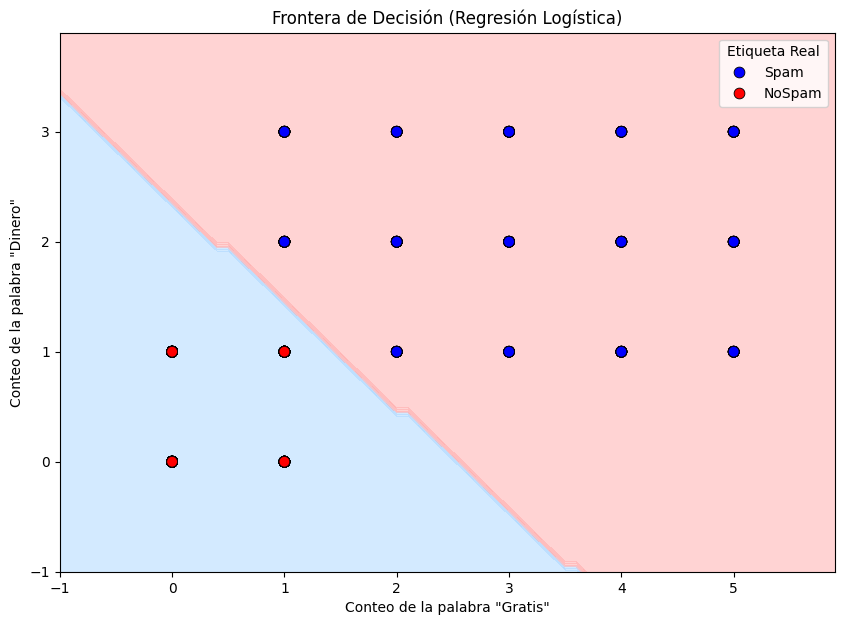

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

df = pd.read_csv('spam_dataset.csv')

print("Datos cargados...")

y = df['label']
X = df[['conteo_gratis', 'conteo_dinero']]

print("Entrenando modelo de Regresión Logística")
model = LogisticRegression(random_state=42) 
model.fit(X, y)

score = model.score(X, y)
print(f"Puntuación del modelo: {score}")

print("Generando gráfico de la Frontera de Decisión...")

x_min, x_max = X['conteo_gratis'].min() - 1, X['conteo_gratis'].max() + 1
y_min, y_max = X['conteo_dinero'].min() - 1, X['conteo_dinero'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z_labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = np.array([0 if label == 'NoSpam' else 1 for label in Z_labels])
Z = Z.reshape(xx.shape)

cmap_background = ListedColormap(['#a8d6ff', '#ffa8a8'])
cmap_points = ['blue', 'red']

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.5)
sns.scatterplot(
    x='conteo_gratis', 
    y='conteo_dinero', 
    hue='label', 
    data=df, 
    palette=cmap_points, 
    edgecolor='k', 
    s=60
)
plt.title('Frontera de Decisión (Regresión Logística)')
plt.xlabel('Conteo de la palabra "Gratis"')
plt.ylabel('Conteo de la palabra "Dinero"')
plt.legend(title='Etiqueta Real')
plt.show()



## 📏 Para Regresión (Predecir un Número)

El método `.score()` calcula el **$R^2$ (R-cuadrado)**.

* **Pregunta que responde:** ¿Qué **porcentaje** de la variación en los datos reales puede *explicar* mi modelo?
* **Cómo se calcula (conceptualmente):** Compara el error de tu modelo con el error de un modelo "tonto" que solo predice el precio promedio.
* **Resultado:** Un número entre 0.0 y 1.0.
    * **0.84** significa: "Mi modelo explica el 84% de por qué los precios suben o bajan".
    * **0.0** significa: "Mi modelo es tan malo como simplemente adivinar el promedio".

---

## ✅ Para Clasificación (Predecir una Etiqueta)

El método `.score()` calcula el **Accuracy (Exactitud)**.

* **Pregunta que responde:** ¿Qué **porcentaje** de etiquetas adivinó *correctamente*?
* **Cómo se calcula (literalmente):**
    $$
    \frac{\text{Número de Aciertos}}{\text{Total de Predicciones}}
    $$
* **Resultado:** Un número entre 0.0 y 1.0.
    * **0.92** significa: "Mi modelo acertó el 92% de las predicciones (ej. 92 de 100)".
    * **0.0** significa: "Mi modelo no acertó ninguna".

# Diferentes modelo de arboles de desicion

In [ ]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Cargando el archivo 'datos_casas_venta.csv'...
Entrenando el modelo LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 1
[LightGBM] [Info] Start training from score 333709.950000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

c:\Users\gerar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


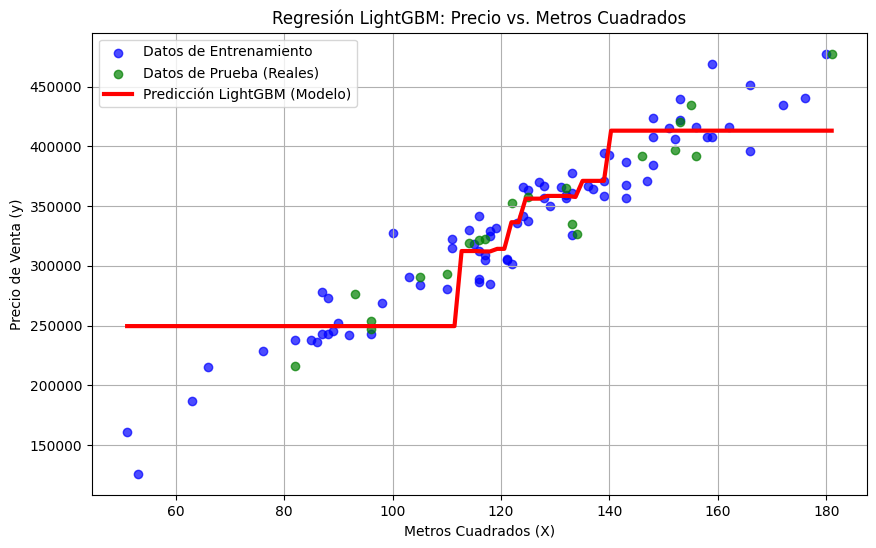

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import matplotlib.pyplot as plt

print("Cargando el archivo 'datos_casas_venta.csv'...")
df = pd.read_csv('datos_casas_venta.csv')

X = df[['MetrosCuadrados']]
y = df['PrecioVenta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Entrenando el modelo LightGBM...")

modelo_lgm = lgb.LGBMRegressor(random_state=42)

modelo_lgm.fit(X_train, y_train)

print("¡Modelo LightGBM entrenado!")

modelo_lgm_score = modelo_lgm.score(X_test, y_test)
print(f"Puntuación LightGBM: {modelo_lgm_score}")

print("Generando gráfico...")
plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, color='blue', label='Datos de Entrenamiento', alpha=0.7)
plt.scatter(X_test, y_test, color='green', label='Datos de Prueba (Reales)', alpha=0.7)

X_rango = np.linspace(X.values.min(), X.values.max(), 100).reshape(-1, 1)

y_pred_rango = modelo_lgm.predict(X_rango)

plt.plot(X_rango, y_pred_rango, color='red', linewidth=3, label='Predicción LightGBM (Modelo)')

plt.title('Regresión LightGBM: Precio vs. Metros Cuadrados')
plt.xlabel('Metros Cuadrados (X)')
plt.ylabel('Precio de Venta (y)')
plt.legend()
plt.grid(True)
plt.show()


Cargando el archivo 'datos_casas_venta.csv'...
Entrenando el modelo Random Forest...
¡Modelo Random Forest entrenado!
Puntuación Random Forest: 0.9189834467731024
Generando gráfico...


c:\Users\gerar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


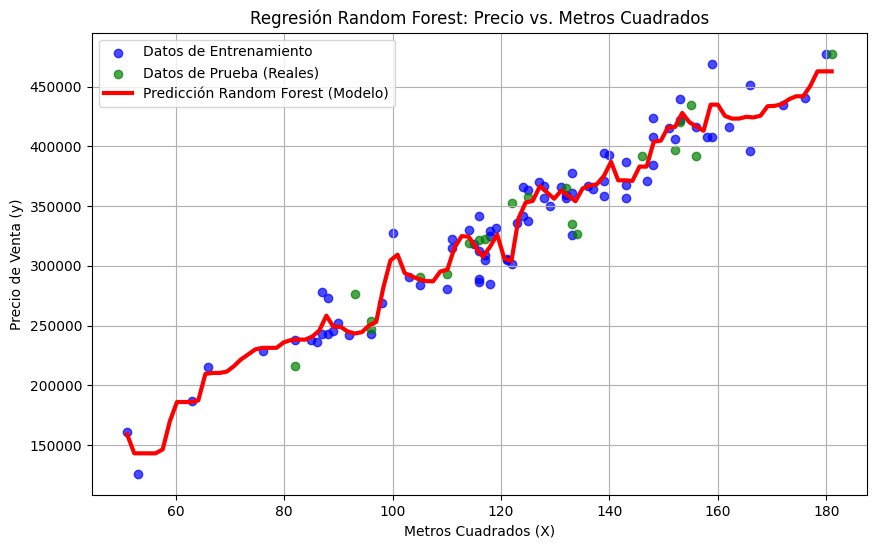

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

print("Cargando el archivo 'datos_casas_venta.csv'...")
df = pd.read_csv('datos_casas_venta.csv')

X = df[['MetrosCuadrados']]
y = df['PrecioVenta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Entrenando el modelo Random Forest...")
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42) 
modelo_rf.fit(X_train, y_train)

print("¡Modelo Random Forest entrenado!")
modelo_rf_score = modelo_rf.score(X_test, y_test)
print(f"Puntuación Random Forest: {modelo_rf_score}")

print("Generando gráfico...")
plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, color='blue', label='Datos de Entrenamiento', alpha=0.7)
plt.scatter(X_test, y_test, color='green', label='Datos de Prueba (Reales)', alpha=0.7)

X_rango = np.linspace(X.values.min(), X.values.max(), 100).reshape(-1, 1)
y_pred_rango = modelo_rf.predict(X_rango)

plt.plot(X_rango, y_pred_rango, color='red', linewidth=3, label='Predicción Random Forest (Modelo)')

plt.title('Regresión Random Forest: Precio vs. Metros Cuadrados')
plt.xlabel('Metros Cuadrados (X)')
plt.ylabel('Precio de Venta (y)')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Cargando el archivo 'datos_casas_venta.csv'...
Entrenando el modelo XGBoost...
¡Modelo XGBoost entrenado!
Puntuación XGBoost: 0.910708556935288
Generando gráfico...


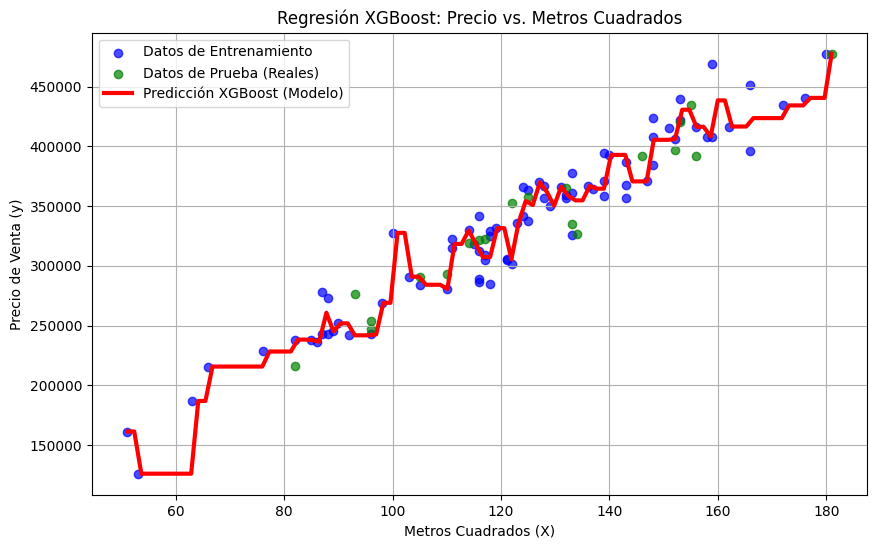

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

print("Cargando el archivo 'datos_casas_venta.csv'...")
df = pd.read_csv('datos_casas_venta.csv')

X = df[['MetrosCuadrados']]
y = df['PrecioVenta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Entrenando el modelo XGBoost...")
modelo_xgb = xgb.XGBRegressor(random_state=42)
modelo_xgb.fit(X_train, y_train)

print("¡Modelo XGBoost entrenado!")
modelo_xgb_score = modelo_xgb.score(X_test, y_test)
print(f"Puntuación XGBoost: {modelo_xgb_score}")

print("Generando gráfico...")
plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, color='blue', label='Datos de Entrenamiento', alpha=0.7)
plt.scatter(X_test, y_test, color='green', label='Datos de Prueba (Reales)', alpha=0.7)

X_rango = np.linspace(X.values.min(), X.values.max(), 100).reshape(-1, 1)
y_pred_rango = modelo_xgb.predict(X_rango)

plt.plot(X_rango, y_pred_rango, color='red', linewidth=3, label='Predicción XGBoost (Modelo)')

plt.title('Regresión XGBoost: Precio vs. Metros Cuadrados')
plt.xlabel('Metros Cuadrados (X)')
plt.ylabel('Precio de Venta (y)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
pip install catboost

  Using cached catboost-1.2.8-cp312-cp312-win_amd64.whl.metadata (1.5 kB)
Using cached catboost-1.2.8-cp312-cp312-win_amd64.whl (102.4 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Cargando el archivo 'datos_casas_venta.csv'...
Entrenando el modelo CatBoost...
¡Modelo CatBoost entrenado!
Puntuación CatBoost: 0.92302383005583
Generando gráfico...


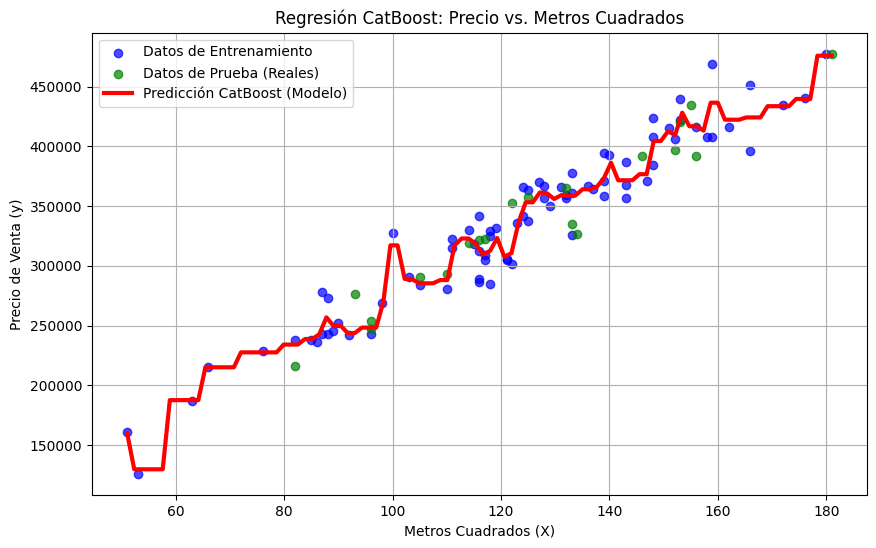

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

print("Cargando el archivo 'datos_casas_venta.csv'...")
df = pd.read_csv('datos_casas_venta.csv')

X = df[['MetrosCuadrados']]
y = df['PrecioVenta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Entrenando el modelo CatBoost...")
modelo_cat = CatBoostRegressor(random_state=42, verbose=False)
modelo_cat.fit(X_train, y_train)

print("¡Modelo CatBoost entrenado!")
modelo_cat_score = modelo_cat.score(X_test, y_test)
print(f"Puntuación CatBoost: {modelo_cat_score}")

print("Generando gráfico...")
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos de Entrenamiento', alpha=0.7)
plt.scatter(X_test, y_test, color='green', label='Datos de Prueba (Reales)', alpha=0.7)

X_rango = np.linspace(X.values.min(), X.values.max(), 100).reshape(-1, 1)
y_pred_rango = modelo_cat.predict(X_rango)

plt.plot(X_rango, y_pred_rango, color='red', linewidth=3, label='Predicción CatBoost (Modelo)')
plt.title('Regresión CatBoost: Precio vs. Metros Cuadrados')
plt.xlabel('Metros Cuadrados (X)')
plt.ylabel('Precio de Venta (y)')
plt.legend()
plt.grid(True)
plt.show()


Cargando el archivo 'datos_casas_venta.csv'...
Entrenando el modelo Ridge Regression...
¡Modelo Ridge entrenado!
Puntuación Ridge: 0.9389640365715415
Generando gráfico...


c:\Users\gerar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


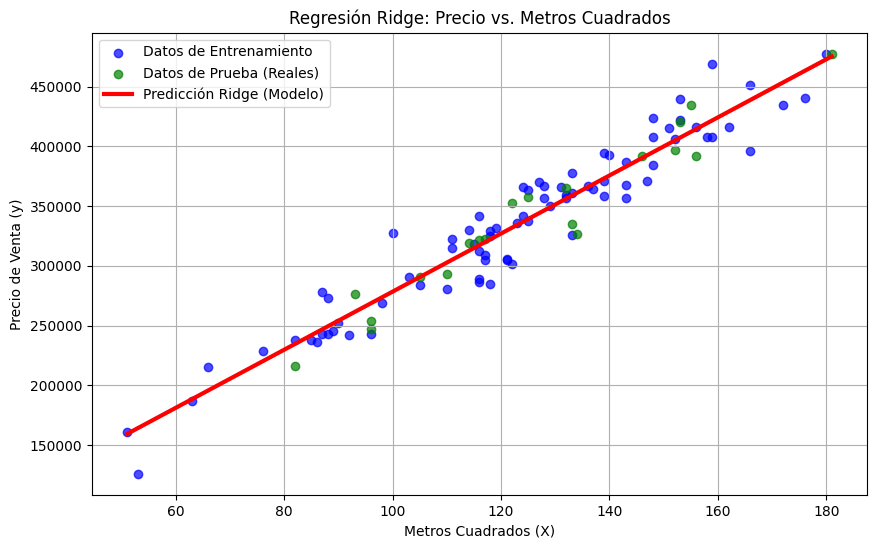

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

print("Cargando el archivo 'datos_casas_venta.csv'...")
df = pd.read_csv('datos_casas_venta.csv')

X = df[['MetrosCuadrados']]
y = df['PrecioVenta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Entrenando el modelo Ridge Regression...")
modelo_ridge = Ridge(alpha=1.0, random_state=42) 
modelo_ridge.fit(X_train, y_train)

print("¡Modelo Ridge entrenado!")
modelo_ridge_score = modelo_ridge.score(X_test, y_test)
print(f"Puntuación Ridge: {modelo_ridge_score}")

print("Generando gráfico")
plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, color='blue', label='Datos de Entrenamiento', alpha=0.7)
plt.scatter(X_test, y_test, color='green', label='Datos de Prueba (Reales)', alpha=0.7)

X_rango = np.linspace(X.values.min(), X.values.max(), 100).reshape(-1, 1)
y_pred_rango = modelo_ridge.predict(X_rango)

plt.plot(X_rango, y_pred_rango, color='red', linewidth=3, label='Predicción Ridge (Modelo)')

plt.title('Regresión Ridge: Precio vs. Metros Cuadrados')
plt.xlabel('Metros Cuadrados (X)')
plt.ylabel('Precio de Venta (y)')
plt.legend()
plt.grid(True)

plt.show()


# Desglose de los 5 Modelos



Regresión Ridge (Puntuación: 0.939)
- Tipo: Modelo Lineal (con Regularización).
- Cómo funciona Busca la única línea recta que mejor predice todos los puntos. La "regularización" (su parámetro alpha) simplemente previene que la línea se vuelva demasiado extrema.
- Por qué ganó El problema era una línea recta. Usamos la herramienta perfecta para el trabajo. No se distrajo con las pequeñas variaciones (el ruido) y capturó la tendencia general.

CatBoost (0.923) y  Random Forest (0.919)

- Tipo: Modelos de Árboles (Boosting y Bagging).

- Cómo funcionan: Crean cientos de reglas "Si/Entonces" (escalones).

- Por qué quedaron segundos: Son los modelos de árboles más robustos contra el sobreajuste. Se dieron cuenta de que la tendencia era mayormente lineal y sus "escalones" (la línea roja rugosa) fueron una aproximación muy cercana a la línea recta.
XGBoost (0.911)

- Tipo: Modelo de Árboles (Boosting).

- Cómo funciona: El "clásico" de alta potencia. Crea árboles en secuencia para corregir errores.

- Resultado: Sigue siendo increíblemente bueno (91.1%), pero en este problema simple, se sobreajustó al ruido de entrenamiento un poco más que CatBoost o Random Forest.

LightGBM (0.845)

- Tipo: Modelo de Árboles (Boosting).

- Cómo funciona: Una versión de Boosting optimizada para ser extremadamente rápida en datasets gigantes (millones de filas).
- Por qué fue el más bajo: Sus optimizaciones de velocidad no son adecuadas para datasets tan pequeños (solo 100 filas). Es como usar un auto de Fórmula 1 para ir a la tienda de la esquina: no está en su elemento.

Lección Final: Siempre empieza con un modelo simple (como Regresión Lineal o Ridge). Si los datos son simples, será tu mejor y más rápido modelo.


### 1\. 🏔️ Regresión Ridge


  * **Código con Hiperparámetros**

    ```python
    # alpha: Fuerza de la penalización
    # solver: El método matemático para encontrar w y b
    modelo_ridge = Ridge(alpha=10.0, solver='auto', random_state=42)
    ```

    *Este código le dice al modelo que aplique una penalización (`alpha`) 10 veces más fuerte que la estándar.*

-----

### 2\. 🌳 Random Forest

  * **Código con Hiperparámetros:**

    ```python
    # n_estimators: El número de árboles en el bosque
    # max_depth: Qué tan "profundo"  puede ser cada árbol
    # min_samples_leaf: Mínimo de muestras para crear una predicción final (previene sobreajuste)
    modelo_rf = RandomForestRegressor(
        n_estimators=500,        # numero de arboles
        max_depth=10,            # Cada árbol solo puede tener 10 "preguntas"
        min_samples_leaf=5,      # Cada predicción debe basarse en al menos 5 casas
        random_state=42
    )
    ```

    *Este código crea un bosque 5 veces más grande, pero con árboles más simples y controlados para evitar que "memoricen" los datos.*

-----

### 3\. 🚀 XGBoost

  * **Código con Hiperparámetros:**

    ```python
    # n_estimators: Número de árboles secuenciales
    # learning_rate: Qué tan "lento" aprende el modelo (más bajo = más preciso pero tarda más)
    # max_depth: Profundidad de cada árbol (se mantiene bajo en boosting)
    modelo_xgb_tuneado = xgb.XGBRegressor(
        n_estimators=1000,       # 1000 árboles en secuencia
        learning_rate=0.01,      # Aprende muy lento (pasos pequeños)
        max_depth=5,             # Árboles "cortos"
        random_state=42
    )
    ```

    *Este es un ajuste clásico: una tasa de aprendizaje baja (`0.01`) combinada con muchos árboles (`1000`) para que el modelo encuentre la mejor solución de forma lenta y precisa.*

-----

### 4\. ⚡ LightGBM


  * **Código con Hiperparámetros:**

    ```python
    # num_leaves: Hiperparámetro clave de LGBM, controla la complejidad
    modelo_lgm_tuneado = lgb.LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.01,
        max_depth=5,
        num_leaves=31,           # 31 "hojas" (predicciones) por árbol
        random_state=42
    )
    ```

    *Similar a XGBoost, buscamos un aprendizaje lento y preciso. `num_leaves` es un ajuste fino de `max_depth`.*

-----

### 5\. 🐱 CatBoost


  * **Código con Hiperparámetros:**

    ```python
    # CatBoost usa nombres ligeramente diferentes:
    # iterations = n_estimators
    # depth = max_depth
    modelo_cat_tuneado = CatBoostRegressor(
        iterations=1500,         # 1500 árboles
        learning_rate=0.02,
        depth=6,                 # Profundidad de 6
        verbose=False,           # Mantenemos el silencio
        random_state=42
    )
    ```

    *Nuevamente, la misma estrategia de *boosting*: muchos árboles (`iterations`) y una tasa de aprendizaje baja para lograr la máxima precisión.*

-----




## 🏔️ 1. Regresión Ridge (Modelo Lineal)
* **Tipo:** Lineal.
* **Cómo funciona:** Busca la **única línea recta** ($y = mx + b$) que mejor se ajusta a todos los datos.
* **En resumen:** Es el modelo más simple. Es rápido e ideal para datos donde la relación es clara y directa
---

## 🌳 2. Random Forest (Modelo de Árboles - "Bagging")
* **Tipo:** Árboles (Bagging / "Democracia").
* **Cómo funciona:** Construye cientos de árboles de decisión **independientes** (en paralelo). Cada árbol se entrena con una muestra aleatoria de los datos.
* **En resumen:** Para predecir, **promedia** la respuesta de todos los árboles. Es muy estable y robusto contra el sobreajuste.

---

## 🚀 3. XGBoost, LightGBM y CatBoost (Modelos de Árboles - "Boosting")
* **Tipo:** Árboles (Boosting / "Especialistas en serie").
* **Cómo funciona:** Construyen árboles **uno después del otro**. El primer árbol hace una predicción, el segundo árbol aprende a **corregir los errores** del primero, el tercero corrige los errores del segundo, y así sucesivamente.
* **En resumen:** Son los modelos más potentes y precisos, pero también los más complejos y sensibles a los hiperparámetros. Se diferencian en *cómo* construyen esos árboles (XGBoost es metódico, LightGBM es rápido, CatBoost es simétrico).

# Validación de modelos 

¿Para Qué Sirve una Matriz de Confusión?


En pocas palabras, una matriz de confusión te dice qué tan bien está clasificando tu modelo y, lo más importante, en qué tipo de errores se está equivocando.

La precisión general (accuracy_score) puede ser engañosa. Si tienes un 90% de precisión, ¿es bueno? ¿Y si el 10% de error es que tu modelo predice que un río "Malo" es "Bueno"? ¡Eso es un error crítico!

La matriz de confusión te ayuda a ver exactamente eso.

Analogía Rápida: Imagina un examen médico para una enfermedad.

    Realidad: Tienes la enfermedad.

    Predicción (Examen): Dice "Positivo".

    Resultado: ¡Correcto! (Verdadero Positivo).

    Realidad: Tienes la enfermedad.

    Predicción (Examen): Dice "Negativo".

    Resultado: ¡Error Grave! (Falso Negativo).

La matriz de confusión desglosa todos estos escenarios.

![Ejemplo de Matriz de Confusión](matrix.jpg)

Cómo Leer la Matriz

Es una tabla donde las filas son la realidad (lo actual) y las columnas son la predicción (lo que dijo tu modelo).

Para este proyecto, tendrás una matriz de 5x5 (Bad, Poor, Moderate, Good, High):

    La Diagonal (Aciertos): Son todos los números en la diagonal principal (esquina superior izquierda a inferior derecha). Aquí es donde la Realidad = Predicción. Quieres que estos números sean lo más altos posible.

        Ejemplo: Fila "Good", Columna "Good" = 500. Significa que 500 ríos que eran "Good" se predijeron correctamente como "Good".

    Fuera de la Diagonal (Errores): Todos los demás números son errores o "confusiones".

        Ejemplo: Fila "Poor" (Real), Columna "Moderate" (Predicho) = 30. Significa que tu modelo se confundió 30 veces y llamó "Moderate" a ríos que en realidad eran "Poor".

        Ejemplo Grave: Fila "Bad" (Real), Columna "Good" (Predicho) = 5. ¡5 veces tu modelo dijo que un río malo estaba bueno! Este es el tipo de error que la matriz te ayuda a cazar.